In [1]:
import pandas as pd
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt

pd.options.display.max_columns = 999
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

import joblib

In [3]:
import shap

# Load Data

In [4]:
base_2018_encoded = pd.read_csv("../data/processed/base_tratada.csv")

In [5]:
print("Formato do banco de dados",base_2018_encoded.shape)
base_2018_encoded.describe()

Formato do banco de dados (9929, 449)


,ano_ingresso,frequentou_cursinho,escolaridade_pai,escolaridade_mae,forma_ingresso [Ampla concorrência],forma_ingresso [PEC-G/Transferência Ex Officio/Decisão Judicial],"forma_ingresso [Reserva de vagas (autodeclarado preto, pardo ou indígena)]",forma_ingresso [Reserva de vagas (cursado integralmente o ensino médio em escolas públicas)],forma_ingresso [Reserva de vagas (pessoa com deficiência)],forma_ingresso [Reserva de vagas (refugiado ou solicitante de refúgio - incluindo situação de vulnerabilidade econômica)],"forma_ingresso [Reserva de vagas (renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo)]",forma_ingresso [Transferência externa],forma_ingresso [Prefiro não responder],idade,nmr_filhos,meio_transporte [Caminhando (percurso total)],meio_transporte [Caminhando (parte do percurso)],meio_transporte [Bicicleta],meio_transporte [Carona],meio_transporte [Fretado/van],meio_transporte [Metrô],meio_transporte [Ônibus da UFABC],meio_transporte [Transporte particular (carro)],meio_transporte [Transporte particular (moto)],meio_transporte [Uber/taxi],meio_transporte [Trem],meio_transporte [Trólebus/ônibus - exceto ônibus da UFABC],meio_transporte [Prefiro não responder],tempo_medio_chegada_na_ufabc,atividade_extraclasse [Não participo de atividades extraclasse relacionadas à UFABC],atividade_extraclasse [AIESEC],atividade_extraclasse [Atividades culturais],atividade_extraclasse [Atividades de extensão],atividade_extraclasse [Atividades esportivas],atividade_extraclasse [AXIS  Atlética UFABC/CAAP],atividade_extraclasse [Coletivos de cunho religioso],atividade_extraclasse [Coletivos relacionados ao ativismo político],atividade_extraclasse [Coletivos relacionados ao empreendedorismo],atividade_extraclasse [Cursos de idiomas],atividade_extraclasse [DCE/Diretório Acadêmico/Centros Acadêmicos.],atividade_extraclasse [Empresas júniores],atividade_extraclasse [ENACTUS UFABC],atividade_extraclasse [Coletivos LGBTQ+],atividade_extraclasse [Coletivos feministas],atividade_extraclasse [Coletivos étnico-raciais],atividade_extraclasse [GPDA UFABC],atividade_extraclasse [Infanteria UFABC],atividade_extraclasse [Ramo Estudantil IEEE da UFABC],"atividade_extraclasse [Representação discente (ConsUni, ConsEPE, Comissões, etc)]",atividade_extraclasse [UFABC Cheer],atividade_extraclasse [Outras atividades extraclasse (não listadas acima)],atividade_extraclasse [Prefiro não responder],nivel_conhecimento_idioma [Alemão],nivel_conhecimento_idioma [Espanhol],nivel_conhecimento_idioma [Francês],nivel_conhecimento_idioma [Inglês],nivel_conhecimento_idioma [Italiano],nivel_conhecimento_idioma [Japonês],nivel_conhecimento_idioma [Libras],dificuldades [Nenhuma],dificuldades [Acessibilidade nas dependências da UFABC],dificuldades [Assuntos familiares/pessoais],dificuldades [Déficit de formação acadêmica básica],dificuldades [Didática dos docentes],dificuldades [Discriminações e preconceitos],dificuldades [Falta de disciplina/hábito de estudo],dificuldades [Problemas de saúde/psicológicos],dificuldades [Questões financeiras],dificuldades [Questões profissionais],dificuldades [Prefiro não responder],dificuldades_emocionais [Nenhuma],dificuldades_emocionais [Ansiedade],"dificuldades_emocionais [Desânimo, falta de vontade de fazer as coisas]",dificuldades_emocionais [Distúrbios alimentares],"dificuldades_emocionais [Ideia de morte (Pensamentos homicidas, medo da morte, etc)]",dificuldades_emocionais [Medo/pânico],dificuldades_emocionais [Pensamento suicida],dificuldades_emocionais [Sensação de desamparo/desespero/desesperança],dificuldades_emocionais [Sensação de desatenção/desorientação/confusão mental],dificuldades_emocionais [Sentimento de solidão],dificuldades_emocionais [Timidez excessiva],dificuldades_emocionais [Tristeza persistente],dificuldades_emocionais [Prefiro não responder],preconceito_discriminacao [Não],"preconceito_discriminacao [Sim, pela instituição de ensino em que cursei o ensino médio]","preconceito_discriminacao [Sim, pel

## Data Pruning
<p>Em teoria, não seria necessária a retirada de nenhum dado 
(não foi identificado a existência de ruido ou outliers negativos),<br>
mas alguns dados seriam impossíveis de serem coletados de ingressantes, então 
serão descartados </p>

In [6]:
columns = {}
for c in base_2018_encoded.columns:
    c = c.split('[')[0]
    if c in columns:
        columns[c]+=1
    else:
        columns[c]=1

In [7]:
print('numero de colunas:',len(columns))
list(columns.keys())

numero de colunas: 66


['ano_ingresso',
 'frequentou_cursinho',
 'escolaridade_pai',
 'escolaridade_mae',
 'forma_ingresso ',
 'idade',
 'nmr_filhos',
 'meio_transporte ',
 'tempo_medio_chegada_na_ufabc',
 'atividade_extraclasse ',
 'nivel_conhecimento_idioma ',
 'dificuldades ',
 'dificuldades_emocionais ',
 'preconceito_discriminacao ',
 'assedio ',
 'fumante',
 'consome_bebidas_alcoolicas',
 'doenca_cronica ',
 'favoraval_cotas ',
 'pdv_diversidade ',
 'pos-bct_pretende ',
 'pos-bct_matriculado ',
 'pos-bch_pretende ',
 'pos-bch_matriculado ',
 'deseja_solicitar_transf_interna',
 'possui_reprovacoes',
 'trancamento_matricula',
 'motivo_trancamento_matricula ',
 'mobilidade_academica',
 'programa_desenv_acad ',
 'CR',
 'CA',
 'horas_semanais_na_ufabc',
 'obj_pos_conclusao ',
 'nota_infraestrutura_sa ',
 'nota_infraestrutura_sbc ',
 'nota ',
 'renda_familiar_mensal',
 'qtd_pessoas_familia',
 'principal_mantedor_familia ',
 'salario_mensal',
 'atividade_remunerada',
 'programa_assist_estudantil ',
 'frequenc

In [8]:
remover =['possui_reprovacoes',
          'trancamento_matricula',
          'motivo_trancamento_matricula ',
          'mobilidade_academica',
          'programa_desenv_acad ',
          'ano_ingresso',
          'pos-bct_matriculado',
          'pos-bct_matriculado']

In [9]:
for r in remover:
    contem = []
    for c in base_2018_encoded.columns:
        if r in c:
            contem.append(c)
    base_2018_encoded.drop(contem,axis=1,inplace=True)

In [10]:
columns = {}
for c in base_2018_encoded.columns:
    c = c.split('[')[0]
    if c in columns:
        columns[c]+=1
    else:
        columns[c]=1

In [11]:
print('numero de colunas:',len(columns))
list(columns.keys())

numero de colunas: 59


['frequentou_cursinho',
 'escolaridade_pai',
 'escolaridade_mae',
 'forma_ingresso ',
 'idade',
 'nmr_filhos',
 'meio_transporte ',
 'tempo_medio_chegada_na_ufabc',
 'atividade_extraclasse ',
 'nivel_conhecimento_idioma ',
 'dificuldades ',
 'dificuldades_emocionais ',
 'preconceito_discriminacao ',
 'assedio ',
 'fumante',
 'consome_bebidas_alcoolicas',
 'doenca_cronica ',
 'favoraval_cotas ',
 'pdv_diversidade ',
 'pos-bct_pretende ',
 'pos-bch_pretende ',
 'pos-bch_matriculado ',
 'deseja_solicitar_transf_interna',
 'CR',
 'CA',
 'horas_semanais_na_ufabc',
 'obj_pos_conclusao ',
 'nota_infraestrutura_sa ',
 'nota_infraestrutura_sbc ',
 'nota ',
 'renda_familiar_mensal',
 'qtd_pessoas_familia',
 'principal_mantedor_familia ',
 'salario_mensal',
 'atividade_remunerada',
 'programa_assist_estudantil ',
 'frequencia_ru',
 'valor_gasto_alimentacao_interna',
 'nota_questionario',
 'como_conheceu ',
 'motivo_escolha ',
 'estado_civil ',
 'sexo_biologico ',
 'identidade_genero ',
 'orientac

# Classificador

#### Para classificar o CR iremos excluir todos que não possuem CR registrado

In [12]:
base_2018_encoded.dropna(subset=['CR'],inplace=True)

#### Separando target

In [13]:
X = base_2018_encoded.drop(['CR','CA'],axis=1)
y = base_2018_encoded['CR']

### Análise do Target

Media do CR: 2.3
Desvio padrão: 0.76


Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


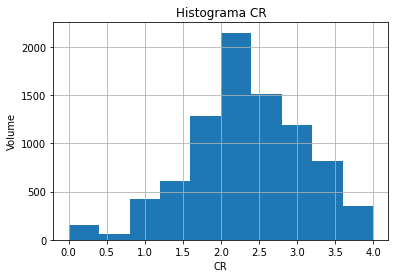

In [14]:
print('Media do CR:','{0:.2}'.format(y.mean()))
print('Desvio padrão:','{0:.2}'.format(y.std()))
fig,axs=plt.subplots(1,1)
axs.set_title('Histograma CR')
axs.set_ylabel('Volume')
axs.set_xlabel('CR')
y.hist(ax=axs)
fig.savefig('../output/figures/histograma_cr.png')
fig.show()

Distribuição do target:
Acima de 2     6029
Abaixo de 2    2540
Name: CR, dtype: int64


Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


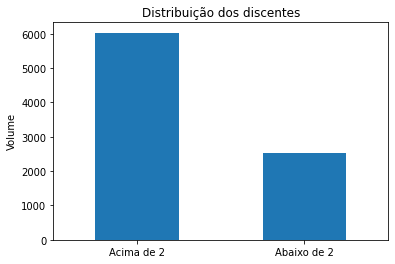

In [15]:
print('Distribuição do target:')
print((y<2).map({True:'Abaixo de 2',False:'Acima de 2'}).value_counts())
fig,axs=plt.subplots(1,1)
axs.set_title('Distribuição dos discentes')
axs.set_ylabel('Volume')
(y<2).map({True:'Abaixo de 2',False:'Acima de 2'}).value_counts().plot(ax=axs,kind='bar',rot=0)
fig.savefig('../output/figures/distribuicao_classes.png')
fig.show()

#### Preenchendo valores nulos com a média

In [16]:
X.fillna(base_2018_encoded.mean(),inplace=True)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [18]:
y_label = y<2

In [19]:
y_label_train = y_train<2
y_label_test = y_test<2  

In [20]:
y_label.value_counts()

False    6029
True     2540
Name: CR, dtype: int64

#### Como a base está desbalanceada, sera feito o oversample da classe alvo

In [21]:
sm = SMOTE(sampling_strategy='minority',random_state=12)

In [22]:
X_train_os, y_label_train_os = sm.fit_resample(X_train, y_label_train)

In [23]:
y_label_train_os.value_counts()

False    4505
True     4505
Name: CR, dtype: int64

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 300, num = 10)]
# Minimum number of samples for split
min_samples_split = range(2,10)
max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 50,
    verbose=True,
    n_jobs = 3,
    cv = 5)

In [ ]:
rf_random.fit(X_train_os, y_label_train_os)

In [ ]:
rf_random.best_score_

In [ ]:
best_rf = rf_random.best_estimator_

In [ ]:
best_rf.get_params

In [ ]:
best_rf.fit(X_train_os,y_label_train_os)

In [ ]:
joblib.dump(best_rf,'../models/random_forest_classifier_cr_prediction_entry_data.pkl')

In [26]:
best_rf = joblib.load('../models/random_forest_classifier_cr_prediction_entry_data.pkl')

Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


In [27]:
best_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 244,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
best_rf.fit(X_train_os,y_label_train_os)

RandomForestClassifier(max_depth=244, max_features='sqrt', min_samples_split=6,
                       n_estimators=200)

In [29]:
pb = best_rf.predict_proba(X_test)
probability =[]
for p in pb:
    probability.append(p[1])

In [30]:
y_score = best_rf.predict(X_test)

In [31]:
accuracy_score(y_label_test,y_score)

0.727484834344377

## Precision vs. Recall

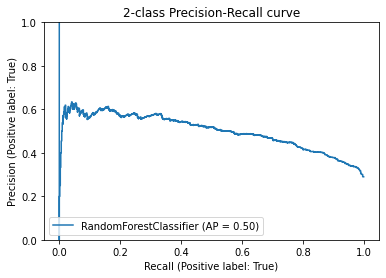

In [32]:
disp = plot_precision_recall_curve(best_rf, X_test, y_label_test)
disp.ax_.set_title('2-class Precision-Recall curve')
disp.ax_.set_ylim(0,1.0)
disp.ax_.get_figure().savefig('../output/figures/precision-recall-curve.png')

In [33]:
predict_p = [x[1] for x in best_rf.predict_proba(X_test)]
fpr,tpr, thresholds = roc_curve(y_label_test,predict_p)
aux_dict = {
    'fpr':fpr,
    'tpr':tpr,
    'thresholds': thresholds
}
df_scores = pd.DataFrame(aux_dict)

In [34]:
recalls = []
precisions = []
for i in thresholds:
    predictions_aux = predict_p>=i
    true_p = (predictions_aux==True) & (y_label_test==True)
    if(True in true_p.value_counts().index):
        tp = true_p.value_counts()[True]
    else:
        tp=0
    #print(tp)
    false_n = (predictions_aux==False) & (y_label_test==True)
    if(True in false_n.value_counts().index):
        fn = false_n.value_counts()[True]
    else:
        fn = 0
    false_p = (predictions_aux==True) & (y_label_test==False)
    if(True in false_p.value_counts().index):
        fp = false_p.value_counts()[True]
    else:
        fp = 0
    #print(fn)
    recalls.append(tp/(tp+fn))
    if((tp+fp)==0):
        precisions.append(0)
    else:
        precisions.append(tp/(tp+fp))
df_scores['recalls'] = recalls
df_scores['precisions'] = precisions

In [35]:
df_scores.loc[(df_scores['recalls']>0.75) & (df_scores['recalls']<=0.8)]

,fpr,tpr,thresholds,recalls,precisions
494,0.377297,0.754443,0.328185,0.754443,0.448177
495,0.378609,0.754443,0.327669,0.754443,0.447318
496,0.378609,0.756058,0.327633,0.756058,0.447847
497,0.379265,0.756058,0.327389,0.756058,0.447419
498,0.379265,0.760905,0.326433,0.760905,0.448999
499,0.381890,0.760905,0.325574,0.760905,0.447293
500,0.381890,0.764136,0.325534,0.764136,0.448341
501,0.385171,0.764136,0.325129,0.764136,0.446226
502,0.385171,0.767367,0.325111,0.767367,0.447269
503,0.386483,0.767367,0.324790,0.767367,0.446429


In [36]:
def predict_with_th(classificator,threshold,X):
    predictions_p = classificator.predict_proba(X)
    predictions_p_p = [x[1] for x in predictions_p]
    return [x>=threshold for x in predictions_p_p]

In [37]:
predictions_with_th = predict_with_th(best_rf,0.290218,X_test)

In [38]:
print("ROC-Auc do modelo implementando o Threshold para Recall 0.8")
print("Acurácia: {0:.2%}".format(accuracy_score(y_label_test,predictions_with_th)))
print("Recall: {0:.2%}".format(recall_score(y_label_test,predictions_with_th)))
print("Precision: {0:.2%}".format(precision_score(y_label_test,predictions_with_th)))
print("ROC Auc: {0:.2%}".format(roc_auc_score(y_label_test,predictions_with_th)))

ROC-Auc do modelo implementando o Threshold para Recall 0.8
Acurácia: 61.04%
Recall: 81.58%
Precision: 41.19%
ROC Auc: 67.14%


## Roc Curve

In [39]:
def plot_roc_curve(fpr,tpr, thresholds):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.title('Roc Curve Analysis')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="center right")
    
    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])
    
    
    
    plt.savefig('../output/figures/roc_and_threshold.png')
    plt.show()
    plt.close()

In [40]:
predict_p = [x[1] for x in best_rf.predict_proba(X_test)]
fpr,tpr, thresholds = roc_curve(y_label_test,predict_p)

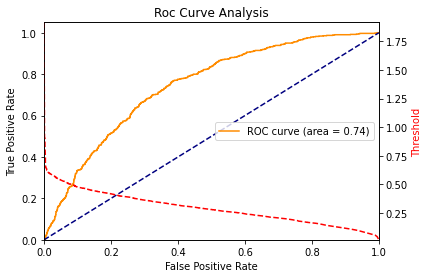

In [41]:
plot_roc_curve(fpr,tpr,thresholds)

# Compiling Results

In [42]:
results_df = pd.DataFrame(best_rf.predict_proba(X_test),columns=best_rf.classes_)
results_df['Predictions'] = best_rf.predict(X_test)
results_df['Real class'] = y_label_test.tolist()
results_df['Correct'] = results_df['Predictions']==results_df['Real class']
results_df['True Positive'] = (results_df['Predictions']==True) & (results_df['Real class']==True)
results_df['False Negative'] = (results_df['Predictions']==False) & (results_df['Real class']==True)

In [43]:
results_df 

,False,True,Predictions,Real class,Correct,True Positive,False Negative
0,0.876524,0.123476,False,False,True,False,False
1,0.828688,0.171312,False,False,True,False,False
2,0.621810,0.378190,False,False,True,False,False
3,0.502835,0.497165,False,True,False,False,True
4,0.604159,0.395841,False,False,True,False,False
...,...,...,...,...,...,...,...
2138,0.407933,0.592067,True,False,False,False,False
2139,0.889985,0.110015,False,False,True,False,False
2140,0.739806,0.260194,False,False,True,False,False
2141,0.788280,0.211720,False,False,True,False,False


# Analisando as Features

In [44]:
importances = best_rf.feature_importances_
dict_aux = {
    'name':X_train.columns.tolist(),
    'importance':importances
}
df_importancias = pd.DataFrame(dict_aux).sort_values('importance',ascending=False).reset_index().drop('index',axis=1)

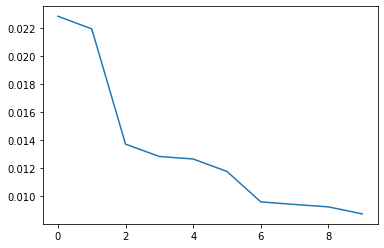

In [45]:
plt.plot(df_importancias['importance'].head(10))

In [46]:
df_importancias.head(20)

,name,importance
0,forma_ingresso [Ampla concorrência],0.022872
1,idade,0.021966
2,forma_ingresso [PEC-G/Transferência Ex Officio...,0.013716
3,forma_ingresso [Reserva de vagas (refugiado ou...,0.012836
4,forma_ingresso [Transferência externa],0.012655
5,forma_ingresso [Prefiro não responder],0.011763
6,consome_subst_psicoativas [Nunca experimentei,0.009585
7,pos-bct_pretende [Nenhum],0.009401
8,pos-bct_pretende [Bacharelado em Matemática],0.009229
9,pos-bct_pretende [Prefiro não responder],0.008725


# Shap Value

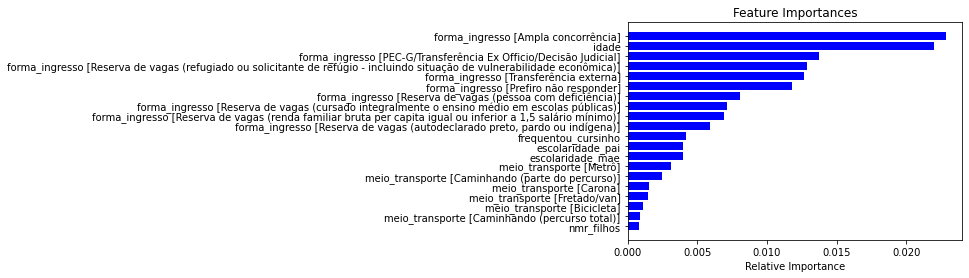

In [47]:
importances = best_rf.feature_importances_[:20]
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [48]:
rf_shap_values = shap.TreeExplainer(best_rf).shap_values(X_train)

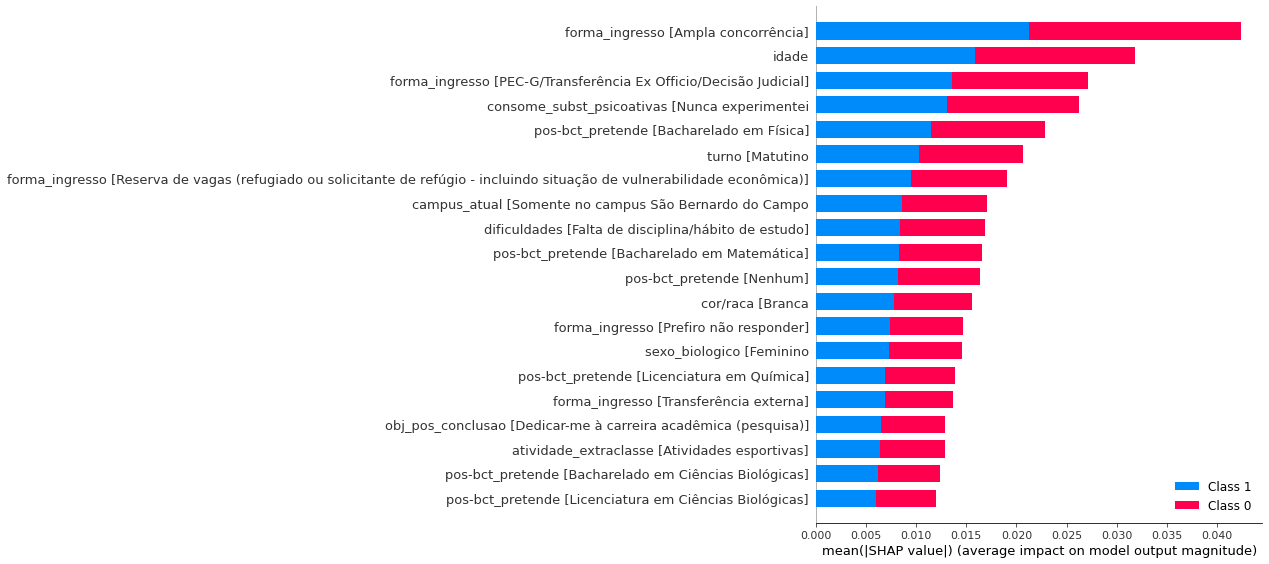

In [49]:
shap.summary_plot(rf_shap_values, X_test)

In [50]:
X_test_sample = X_test.sample(n=500)

In [51]:
k_shap = shap.KernelExplainer(best_rf.predict,X_test_sample)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
k_shap_values = k_shap.shap_values(X_test_sample)

In [ ]:
enum={}
reverse_enum={}
for i in range(0,len(X_test_sample.columns)):
    enum[X_test_sample.columns[i]]=str(i)
    reverse_enum[str(i)]=X_test_sample.columns[i]

In [ ]:
shap.summary_plot(k_shap_values, X_test_sample)